In [1]:
# %matplotlib notebook
%matplotlib inline

# %connect_info
import flow.misc
text = """
Jupyter connect hash:
{word}

To connect to current notebook:
    $> jupyter console --existing {filename}
    
"""
print(text.format(word=flow.misc.notebook_word(), filename=flow.misc.notebook_file(flow.misc.notebook_word())))
print("Last run: {}".format(flow.misc.timestamp()))


Jupyter connect hash:
fraud

To connect to current notebook:
    $> jupyter console --existing kernel-a9c94ca4-5c5d-4480-a964-474c4399076a.json
    

Last run: 2018-10-29-21h29m17s


/usr/local/lib/python2.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.23) or chardet (2.3.0) doesn't match a supported version!
  RequestsDependencyWarning)


In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(context='notebook', style='darkgrid')
# sns.set(context='talk', style='darkgrid')

import flow
import pool
import jzap

In [32]:
db = pool.database.db()

## Testing GLM results

In [3]:
date = flow.metadata.Date('OA205', 180926)
glm = date.glm()
date

Date(mouse=OA205, date=180926, tags=(u'jeff',), photometry=())

In [4]:
glm.groups()

['plus_correct',
 'plus_correct',
 'plus_correct',
 'plus_correct',
 'plus_correct',
 'plus_correct',
 'plus_correct',
 'plus_correct',
 'plus_miss',
 'plus_miss',
 'plus_miss',
 'plus_miss',
 'plus_miss',
 'plus_miss',
 'plus_miss',
 'plus_miss',
 'minus_correct',
 'minus_correct',
 'minus_correct',
 'minus_correct',
 'minus_correct',
 'minus_correct',
 'minus_correct',
 'minus_correct',
 'minus_miss',
 'minus_miss',
 'minus_miss',
 'minus_miss',
 'minus_miss',
 'minus_miss',
 'minus_miss',
 'minus_miss',
 'neutral_correct',
 'neutral_correct',
 'neutral_correct',
 'neutral_correct',
 'neutral_correct',
 'neutral_correct',
 'neutral_correct',
 'neutral_correct',
 'neutral_miss',
 'neutral_miss',
 'neutral_miss',
 'neutral_miss',
 'neutral_miss',
 'neutral_miss',
 'neutral_miss',
 'neutral_miss',
 'offset',
 'offset',
 'offset',
 'offset',
 'offset',
 'offset',
 'offset',
 'offset',
 'lick_onsets',
 'lick_onsets',
 'lick_onsets',
 'lick_onsets',
 'lick_onsets',
 'lick_onsets',
 'lick_o

In [17]:
glm.labels()['ensure'].shape

(127,)

In [6]:
glm.devexp[:, 1]

array([0.00000000e+00, 5.71281769e-01, 1.96301841e+01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 7.26935926e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.98134110e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 9.70756491e-01, 0.00000000e+00, 2.77612650e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.58432853e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.62574985e-01, 1.21512331e-01, 7.44129332e+00, 0.00000000e+00,
       0.00000000e+00, 2.08166905e-01, 0.00000000e+00, 1.05391027e+00,
       0.00000000e+00, 5.25748995e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.88247567e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.28200689e-01,
      

In [16]:
glm.vectors(hz=15.49)['ensure'].shape

(127,)

In [20]:
glm.labels().keys()

['quinine-multiplexed',
 'minus-only',
 'ensure-only',
 'lick',
 'undefined',
 'quinine',
 'minus-multiplexed',
 'neutral-only',
 'plus-only',
 'quinine-only',
 'ensure-multiplexed',
 'neutral',
 'ensure',
 'plus-multiplexed',
 'plus',
 'multiplexed',
 'minus',
 'neutral-multiplexed']

In [22]:
glm.labels()['plus-only'].sum()

3

In [23]:
glm.labels()['ensure-only'].sum()

3

In [24]:
glm.labels()['ensure-multiplexed'].sum()

19

In [25]:
glm.labels()['plus-multiplexed'].sum()

28

In [28]:
glm.labels()['ensure'].sum()

22

In [29]:
glm.labels()['plus'].sum()

31

## Responses over time

In [61]:
mouse = flow.metadata.Mouse('OA205')
label_list = []
for date in mouse.dates():
    glm = date.glm()
    plus = glm.labels()['plus']
    neutral = glm.labels()['neutral']
    minus = glm.labels()['minus']
    ensure = glm.labels()['ensure']
    vdrive_plus = db.get('vdrive_plus', date.mouse, date.date)
    label_list.append({'mouse': date.mouse,
                       'date': date.date,
                       'date_str': str(date.date),
                       'plus': plus.sum() / float(len(plus)),
                       'neutral': neutral.sum() / float(len(neutral)),
                       'minus': minus.sum() / float(len(minus)),
                       'ensure': ensure.sum() / float(len(ensure)),
                       'vdrive_plus': (vdrive_plus > 50).sum() / float(len(vdrive_plus)),
                       'plus-ensure': (plus & ensure).sum() / float(len(ensure)),
                       'vdrive_plus_ensure': ((vdrive_plus > 50) & ensure).sum() / float(len(ensure))})
label_df = pd.DataFrame(label_list)
label_df_long = label_df.melt(id_vars=['mouse', 'date', 'date_str'])

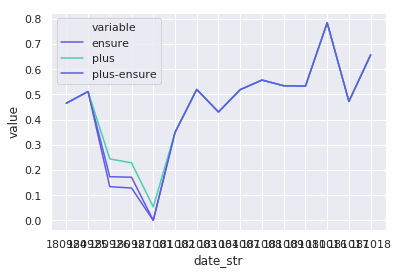

In [62]:
plt.figure()
sns.lineplot('date_str', 'value', data=label_df_long[label_df_long.variable.isin(['plus', 'ensure', 'plus-ensure'])], hue='variable', palette=pool.config.colors())